<center><img src=img/MScAI_brand.png width=70%></center>

# Scikit-Learn: Representation Learning

Different names for the same idea:
* Representation learning
* Learning embeddings
* Manifold learning
* Dimensionality reduction

There are two main goals:

* Reduce dimensionality to save memory/CPU in later supervised/unsupervised tasks, or for visualisation
* Achieve a "better" representation for data which allows downstream algorithms to succeed.

It can be linear:
* Principal components analysis (PCA)
* Random projection

It can be non-linear:
* $t$-SNE
* Multi-dimensional scaling
* Locally linear embedding

In this notebook, we'll see some examples of representation learning. We'll also see how the Scikit-Learn API makes it easy to try out multiple techniques at once.

The usual imports for plotting.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll import a few representation learning models, some for the exercises.

In [3]:
from sklearn.manifold import MDS, TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA

We're going to work with a small dataset of hand-written digits. (Not MNIST.)

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

Here is a nice function (from PDSH) for plotting some of the images with labels.

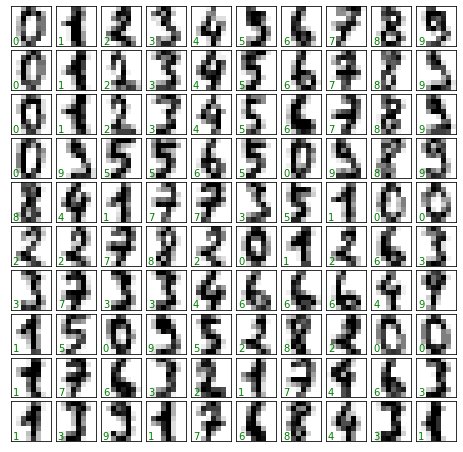

In [6]:
# from PDSH -- for illustration only - you don't need to understand details
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Scikit-Learn expects each $X$ as a flat vector.

In [7]:
X = digits.images.reshape(1797, 64)

And here is a function to plot the embedding.

In [29]:
def plot_embed(X):
    sns.scatterplot(X[:, 0], X[:, 1],
                    hue=digits.target, 
                    legend="full", 
                    palette="Paired")
    plt.gcf().set_size_inches(4, 4)
    plt.show(); plt.close()

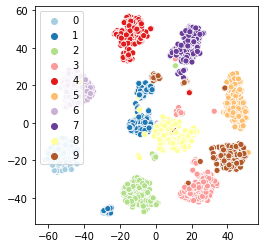

In [31]:
models = [TSNE(n_components=2)]
for model in models:
    model.fit(X)
    emb = model.embedding_
    plot_embed(emb)

Observe the range of $x$ and $y$ values. We don't try to interpret these axes. In fact, one could rotate the whole thing by 90 degrees, or any other amount, and it would be the "same" result -- for visualisation, or for downstream algorithms.

### PCA

`sklearn.decomposition.PCA` is the class to use for Principal Components Analysis. In principle it should have an API similar to $t$-SNE. But there are a couple of differences: 

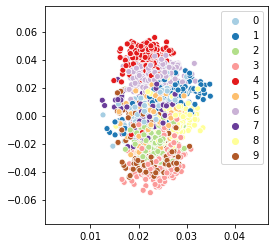

In [25]:
models = [PCA(n_components=2)]

for model in models:
    model.fit(X.T) # transpose here and below
    emb = model.components_.T # not .embedding_
    plot_embed(emb)

PCA seems not to produce a nice separated embedding, like $t$-SNE. But it has the important advantage that after fitting on `X`, we can later map new data into the embedding space. In Scikit-Learn's terms, `PCA` is *inductive* because it has a `transform` method. `TSNE` is *transductive* because it doesn't. As a result, `PCA` can be used to transform data for downstream supervised learning tasks but `TSNE` can't.


**Exercise**:

1. More than any other ML technique, it's essential to look at the result of representation learning, and judge it subjectively. Look at the embedding produced by $t$-SNE. Are digits in "good" places?
2. Add some other models so that they run in our loop. Consider `MDS`, `LocallyLinearEmbedding`, or whatever you like from the same module. Use a 2D embedding in each case. Do they need different hyperparameters? Note: `MDS.fit()` takes ~60s on a 5-year-old Thinkpad.


**Exercise**:

3. Each model has a different definition for `score()`, so it is not useful to compare across models. But it is interesting to compare performance for different dimensions. Make a table showing the score for each model, and for several different dimensionalities (e.g. $n=2, 4, 8, 16$, bearing in mind the digits themselves are 64D) and bearing in mind that we can only visualise 2D.

**Solution 1**:

I would remark e.g. that digits 3 and 9 are close by each other, and so are 4 and 7. These reflect similarities in digit shape.

**Solution 2**:

```python
models = [TSNE(n_components=2), LocallyLinearEmbedding(n_components=2), MDS(n_components=2)]
```

should do the trick. In my run, `LocallyLinearEmbedding` does not do well, but it can be useful for some datasets.

**Solution 3**:

Just use eg `n_componentss = [2, 4, 8, 16]` and iterate `for n_components in n_componentss:`. 